# Data Analysis on Bike Store Sales

The data set is downloaded from Kaggle.
[Bike Store Sales in Europe](https://www.kaggle.com/datasets/serhatabuk/sales-data-csv)


In [1]:
#Data Manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Loading the Data

In [3]:
df = pd.read_csv('sales_data.csv')
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


## Cleaning Data

In [ ]:
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
print(df.dtypes)
#df.describe()

Date                datetime64[ns]
Day                          int32
Month                        int32
Year                         int32
Customer_Age                 int64
Age_Group                   object
Customer_Gender             object
Country                     object
State                       object
Product_Category            object
Sub_Category                object
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Cost                         int64
Revenue                      int64
dtype: object


## Feature Engineering

- Profits per unit
- Grouping Sales into Seasons(In Respective Countries)
- Checking if "Cost" matches "Unit_Price" * "Order_Quantity"
- Profits per Order Quantity
-

### Profits per Unit
This tells us which products are the most profitable

In [12]:
df["Profits_per_unit"]= df["Profit"] / df["Order_Quantity"]

### Adding Season Column
Allows sales to be grouped into categories for analysis

In [5]:
#Used ChatGBT
def add_season(row):
    """
    Assigns a season for the sale(Winter, Spring, Summer, Autumn).
    Dependent on Country
    """

    country = row["Country"]
    month = row["Month"]
    if country in ['Canada','United States', 'Germany', 'France', 'United Kingdom']: # Countries in the Norther Hemisphere
        if month in [12, 1, 2]:
            return "Winter"
        elif month in [3, 4, 5]:
            return "Spring"
        elif month in [6, 7, 8]:
            return "Summer"
        else:
            return "Autumn"
    else: #Countries in the Southern Hemisphere. (Only Australia)
        if month in [12, 1, 2]:
            return "Summer"
        elif month in [3, 4, 5]:
            return "Autumn"
        elif month in [6, 7, 8]:
            return "Winter"
        else:
            return "Spring"
        
df["Season"] = df.apply(add_season, axis=1)

In [13]:
df[["Month","Country","Season"]] #Checking if Season matches the month of the respective countries

,Month,Country,Season
0,11,Canada,Autumn
1,11,Canada,Autumn
2,3,Australia,Autumn
3,3,Australia,Autumn
4,5,Australia,Autumn
...,...,...,...
113031,4,United Kingdom,Spring
113032,4,Australia,Autumn
113033,4,Australia,Autumn
113034,3,France,Spring


### Calculating cost through Unit Cost and Order Quantity
Checks if cost for order is correct.

In [19]:
df["Calculated_Cost"] = df["Unit_Cost"] * df["Order_Quantity"] 
df[["Order_Quantity", "Unit_Cost", "Cost", "Calculated_Cost"]]

,Order_Quantity,Unit_Cost,Cost,Calculated_Cost
0,8,45,360,360
1,8,45,360,360
2,23,45,1035,1035
3,20,45,900,900
4,4,45,180,180
...,...,...,...,...
113031,3,24,72,72
113032,22,24,528,528
113033,22,24,528,528
113034,24,24,576,576


### Calculating revenue through Unit Price and Order Quantity
Checks if revenue gained from order is correct.

In [20]:
df["Calculated_Revenue"] = df["Unit_Price"] * df["Order_Quantity"] 
df[["Order_Quantity", "Unit_Cost", "Revenue", "Calculated_Revenue"]]

,Order_Quantity,Unit_Cost,Revenue,Calculated_Revenue
0,8,45,950,960
1,8,45,950,960
2,23,45,2401,2760
3,20,45,2088,2400
4,4,45,418,480
...,...,...,...,...
113031,3,24,184,192
113032,22,24,1183,1408
113033,22,24,1183,1408
113034,24,24,1260,1536


### Which year had the most sales?

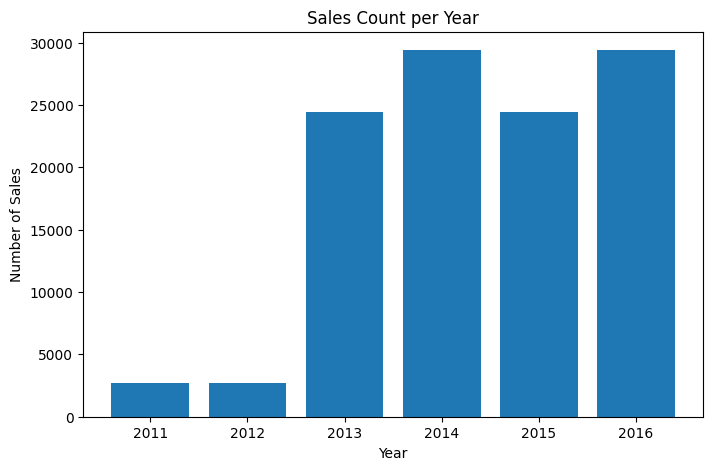

In [7]:
count_per_year = df["Year"].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(count_per_year.index, count_per_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Sales")
plt.title("Sales Count per Year")
plt.show()

### Which Month had the most sales?

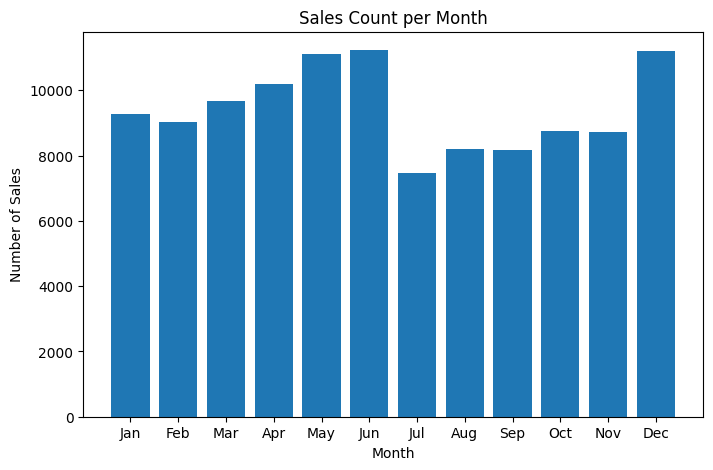

In [8]:
count_per_month = df["Month"].value_counts().sort_index()
list_months=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(8,5))
plt.bar(list_months, count_per_month.values)
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.title("Sales Count per Month")
plt.show()

### Which Countries had the most orders?

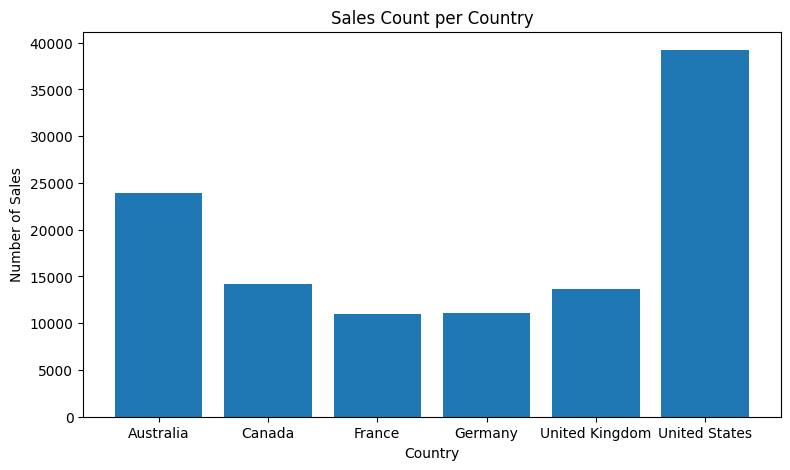

In [9]:
count_per_country = df["Country"].value_counts().sort_index()

plt.figure(figsize=(9,5))
plt.bar(count_per_country.index, count_per_country.values)
plt.xlabel("Country")
plt.ylabel("Number of Sales")
plt.title("Sales Count per Country")
plt.show()

### Which Season had the most orders?

In [11]:
fig = px.pie(
    df,
    names="Season",  # The categorical variable
    values="Profit", # value used for representation
    title="Profit by Season"
)
fig.show()